In [1]:
import pandas as pd
data =pd.read_csv("auto_gen.csv")
data.head()

,ID,Jupiter,Ketu,Mars,Mercury,Moon,Neptune,Pluto,Rahu,Saturn,Sun,Uranus,Venus,DOB,TOB,GENDER
0,0,226.342217,273.704349,331.464958,230.384068,106.069269,319.942100,266.359754,93.704349,256.578477,249.465284,4.654040,203.151021,2018-12-25,11:22:35,1
1,1,230.319659,272.683339,344.416845,258.912415,352.045961,320.349543,266.990833,92.683339,258.835892,269.090776,4.592147,222.396505,2019-01-13,15:47:24,2
2,2,215.629354,276.271882,300.558040,223.556882,191.367644,319.773082,265.076429,96.271882,251.423034,200.401333,5.981953,183.080058,2018-11-07,04:32:42,2
3,3,238.028124,265.970803,68.654672,33.424242,233.017090,324.414880,268.969516,85.970803,266.163327,34.966060,10.032233,11.900672,2019-05-20,09:53:08,1
4,4,215.919118,276.201756,301.338189,224.818097,209.084405,319.760201,265.100415,96.201756,251.540399,201.729839,5.930166,182.607536,2018-11-08,13:18:18,2


In [2]:
data.isnull().sum()

ID         0
Jupiter    8
Ketu       8
Mars       8
Mercury    8
Moon       8
Neptune    8
Pluto      8
Rahu       8
Saturn     8
Sun        8
Uranus     8
Venus      8
DOB        0
TOB        0
GENDER     0
dtype: int64

In [3]:
data=data.dropna(thresh=8,axis=0)
data.isnull().sum()

ID         0
Jupiter    0
Ketu       0
Mars       0
Mercury    0
Moon       0
Neptune    0
Pluto      0
Rahu       0
Saturn     0
Sun        0
Uranus     0
Venus      0
DOB        0
TOB        0
GENDER     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 999
Data columns (total 16 columns):
ID         992 non-null int64
Jupiter    992 non-null float64
Ketu       992 non-null float64
Mars       992 non-null float64
Mercury    992 non-null float64
Moon       992 non-null float64
Neptune    992 non-null float64
Pluto      992 non-null float64
Rahu       992 non-null float64
Saturn     992 non-null float64
Sun        992 non-null float64
Uranus     992 non-null float64
Venus      992 non-null float64
DOB        992 non-null object
TOB        992 non-null object
GENDER     992 non-null int64
dtypes: float64(12), int64(2), object(2)
memory usage: 131.8+ KB


In [5]:
data['DOB']=pd.to_datetime(data['DOB'])
data['year'] = data['DOB'].dt.year
data['month']=data['DOB'].dt.month
data['day']=data['DOB'].dt.day
data['TOB']=pd.to_datetime(data['TOB'])
data['hour']= data['TOB'].dt.hour
data['minutes']=data['TOB'].dt.minute
data['second']=data['TOB'].dt.second
data.head()

,ID,Jupiter,Ketu,Mars,Mercury,Moon,Neptune,Pluto,Rahu,Saturn,Sun,Uranus,Venus,DOB,TOB,GENDER,year,month,day,hour,minutes,second
0,0,226.342217,273.704349,331.464958,230.384068,106.069269,319.942100,266.359754,93.704349,256.578477,249.465284,4.654040,203.151021,2018-12-25,2019-07-04 11:22:35,1,2018,12,25,11,22,35
1,1,230.319659,272.683339,344.416845,258.912415,352.045961,320.349543,266.990833,92.683339,258.835892,269.090776,4.592147,222.396505,2019-01-13,2019-07-04 15:47:24,2,2019,1,13,15,47,24
2,2,215.629354,276.271882,300.558040,223.556882,191.367644,319.773082,265.076429,96.271882,251.423034,200.401333,5.981953,183.080058,2018-11-07,2019-07-04 04:32:42,2,2018,11,7,4,32,42
3,3,238.028124,265.970803,68.654672,33.424242,233.017090,324.414880,268.969516,85.970803,266.163327,34.966060,10.032233,11.900672,2019-05-20,2019-07-04 09:53:08,1,2019,5,20,9,53,8
4,4,215.919118,276.201756,301.338189,224.818097,209.084405,319.760201,265.100415,96.201756,251.540399,201.729839,5.930166,182.607536,2018-11-08,2019-07-04 13:18:18,2,2018,11,8,13,18,18


In [6]:
data.columns[[0,13,14]]

Index(['ID', 'DOB', 'TOB'], dtype='object')

In [7]:
data.drop(data.columns[[0,13,14]],axis=1,inplace=True)
data.head()

,Jupiter,Ketu,Mars,Mercury,Moon,Neptune,Pluto,Rahu,Saturn,Sun,Uranus,Venus,GENDER,year,month,day,hour,minutes,second
0,226.342217,273.704349,331.464958,230.384068,106.069269,319.942100,266.359754,93.704349,256.578477,249.465284,4.654040,203.151021,1,2018,12,25,11,22,35
1,230.319659,272.683339,344.416845,258.912415,352.045961,320.349543,266.990833,92.683339,258.835892,269.090776,4.592147,222.396505,2,2019,1,13,15,47,24
2,215.629354,276.271882,300.558040,223.556882,191.367644,319.773082,265.076429,96.271882,251.423034,200.401333,5.981953,183.080058,2,2018,11,7,4,32,42
3,238.028124,265.970803,68.654672,33.424242,233.017090,324.414880,268.969516,85.970803,266.163327,34.966060,10.032233,11.900672,1,2019,5,20,9,53,8
4,215.919118,276.201756,301.338189,224.818097,209.084405,319.760201,265.100415,96.201756,251.540399,201.729839,5.930166,182.607536,2,2018,11,8,13,18,18


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 999
Data columns (total 19 columns):
Jupiter    992 non-null float64
Ketu       992 non-null float64
Mars       992 non-null float64
Mercury    992 non-null float64
Moon       992 non-null float64
Neptune    992 non-null float64
Pluto      992 non-null float64
Rahu       992 non-null float64
Saturn     992 non-null float64
Sun        992 non-null float64
Uranus     992 non-null float64
Venus      992 non-null float64
GENDER     992 non-null int64
year       992 non-null int64
month      992 non-null int64
day        992 non-null int64
hour       992 non-null int64
minutes    992 non-null int64
second     992 non-null int64
dtypes: float64(12), int64(7)
memory usage: 155.0 KB


In [9]:
data.describe(include="all")

,Jupiter,Ketu,Mars,Mercury,Moon,Neptune,Pluto,Rahu,Saturn,Sun,Uranus,Venus,GENDER,year,month,day,hour,minutes,second
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,222.171246,273.846737,199.644634,195.437019,192.061278,321.801253,266.846915,93.846737,257.166038,174.554815,7.335663,192.479667,1.543347,2018.477823,6.478831,16.069556,11.524194,29.576613,29.445565
std,15.520295,5.733067,126.445729,99.247133,105.871662,1.604874,1.646303,5.733067,7.024089,104.630908,1.903439,87.504065,0.498369,0.499760,3.344582,8.768706,6.896775,17.657584,16.806342
min,199.330523,264.079329,0.260455,0.953424,2.163011,319.680116,264.742331,84.079329,248.528679,0.822684,4.572256,0.277137,1.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,205.581953,268.802406,59.673665,111.045751,101.503437,320.319501,265.206536,88.802406,250.089655,83.346612,5.619166,149.926419,1.000000,2018.000000,4.000000,9.000000,6.000000,14.000000,15.000000
50%,225.373140,273.941974,276.951092,209.188660,208.444165,321.635525,266.362133,93.941974,256.053076,167.914616,7.607171,190.450716,2.000000,2018.000000,7.000000,16.000000,12.000000,30.000000,29.000000
75%,237.303710,278.954605,294.555584,291.638893,283.226675,322.911831,268.621641,98.954605,264.879454,267.477306,8.483642,252.855632,2.000000,2019.000000,9.000000,24.000000,18.000000,45.000000,44.000000
max,240.322445,283.364974,359.713906,358.691342,359.474605,324.696412,269.123981,103.364974,266.490972,359.130525,11.670524,359.902586,2.000000,2019.000000,12.000000,31.000000,23.000000,59.000000,59.000000


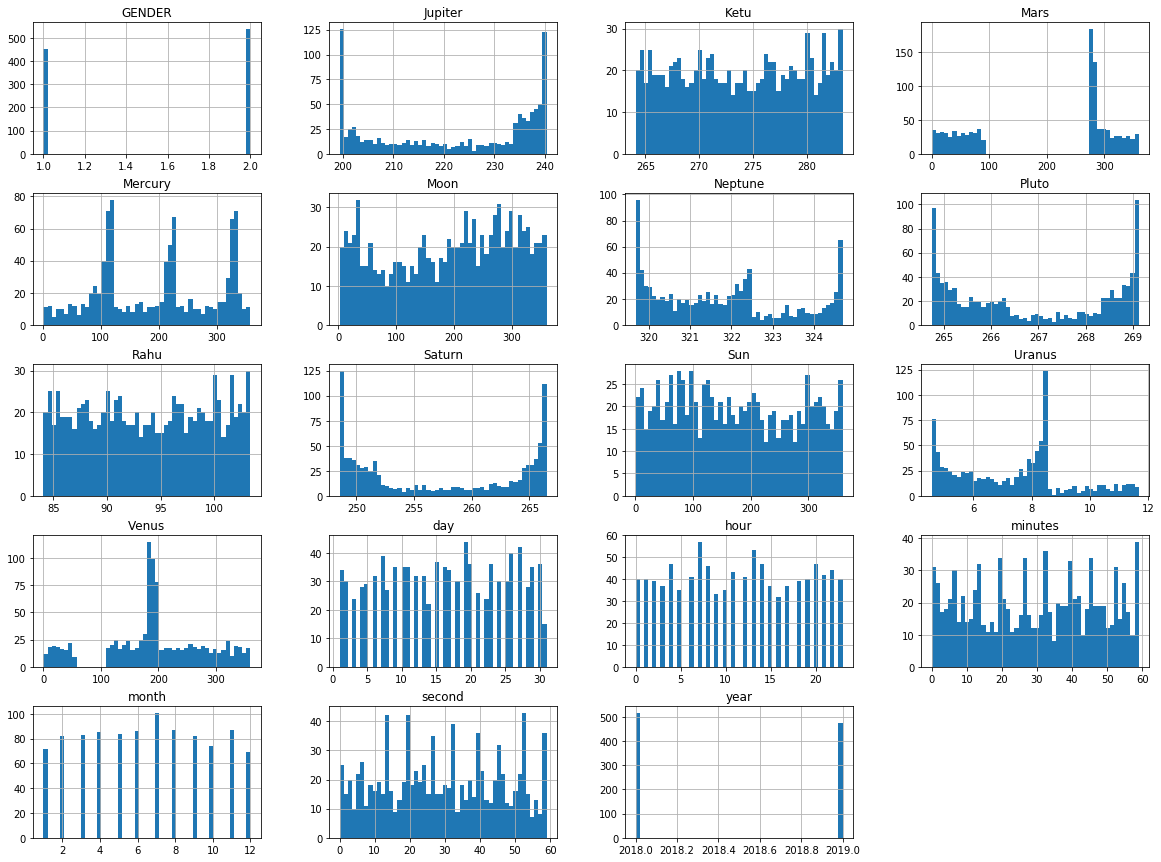

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [11]:
data.corr()

,Jupiter,Ketu,Mars,Mercury,Moon,Neptune,Pluto,Rahu,Saturn,Sun,Uranus,Venus,GENDER,year,month,day,hour,minutes,second
Jupiter,1.000000,-0.954243,-0.717736,0.472749,-0.052217,0.426167,0.882091,-0.954243,0.953347,0.292411,-0.070180,0.321890,0.028617,0.899712,-0.594198,-0.046509,0.013493,0.025672,0.021736
Ketu,-0.954243,1.000000,0.734730,-0.247069,0.034834,-0.575204,-0.870945,1.000000,-0.940748,-0.072419,-0.189994,-0.113207,-0.026344,-0.874176,0.500761,0.026517,-0.006046,-0.023055,-0.029285
Mars,-0.717736,0.734730,1.000000,-0.250386,0.040348,-0.716530,-0.838126,0.734730,-0.811340,-0.040821,-0.340178,-0.225339,-0.010224,-0.757930,0.571543,0.045687,-0.013555,0.026090,-0.004473
Mercury,0.472749,-0.247069,-0.250386,1.000000,-0.000756,-0.290142,0.269349,-0.247069,0.326203,0.725158,-0.673232,0.796309,0.032312,0.348621,-0.362535,-0.023973,0.043451,0.018497,0.002050
Moon,-0.052217,0.034834,0.040348,-0.000756,1.000000,0.010188,-0.033802,0.034834,-0.039558,-0.073896,0.042258,-0.093750,-0.023033,-0.014262,-0.023371,0.142769,-0.036770,-0.028882,0.048953
Neptune,0.426167,-0.575204,-0.716530,-0.290142,0.010188,1.000000,0.753425,-0.575204,0.661187,-0.492343,0.804131,-0.217589,-0.009293,0.603660,-0.468048,0.021335,-0.011166,-0.036634,0.010056
Pluto,0.882091,-0.870945,-0.838126,0.269349,-0.033802,0.753425,1.000000,-0.870945,0.981356,0.044393,0.239619,0.197365,0.010042,0.926364,-0.729772,-0.031762,0.006822,-0.006894,0.016698
Rahu,-0.954243,1.000000,0.734730,-0.247069,0.034834,-0.575204,-0.870945,1.000000,-0.940748,-0.072419,-0.189994,-0.113207,-0.026344,-0.874176,0.500761,0.026517,-0.006046,-0.023055,-0.029285
Saturn,0.953347,-0.940748,-0.811340,0.326203,-0.039558,0.661187,0.981356,-0.940748,1.000000,0.113426,0.153384,0.217667,0.017633,0.938875,-0.678218,-0.036867,0.009528,0.006897,0.021132
Sun,0.292411,-0.072419,-0.040821,0.725158,-0.073896,-0.492343,0.044393,-0.072419,0.113426,1.000000,-0.772790,0.534045,0.017683,0.176871,-0.234261,-0.102841,0.047551,0.028737,0.010674


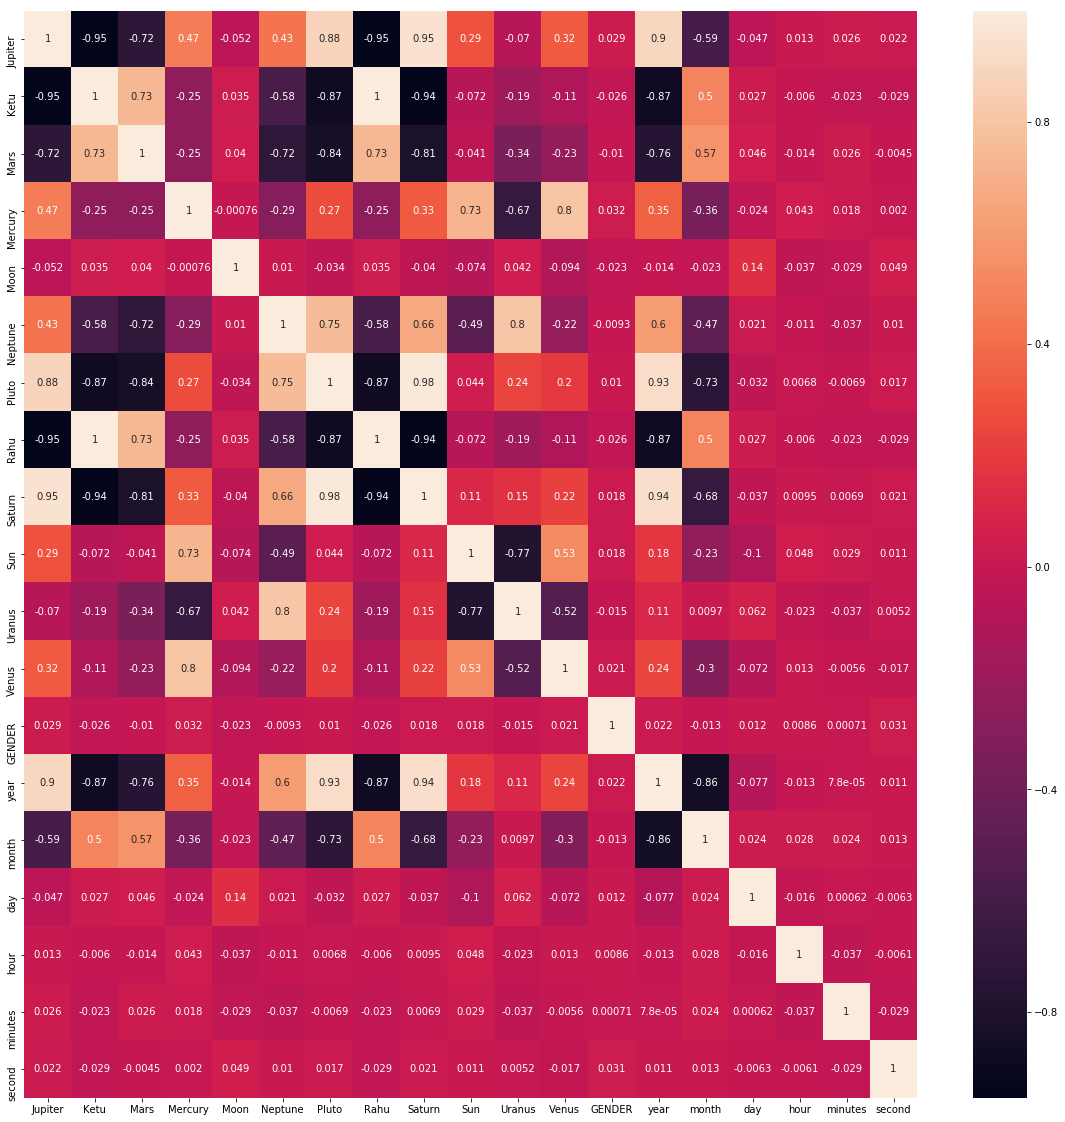

In [12]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)

In [13]:
corr_matrix = data.corr()
corr_matrix["Jupiter"].sort_values(ascending=False)

Jupiter    1.000000
Saturn     0.953347
year       0.899712
Pluto      0.882091
Mercury    0.472749
Neptune    0.426167
Venus      0.321890
Sun        0.292411
GENDER     0.028617
minutes    0.025672
second     0.021736
hour       0.013493
day       -0.046509
Moon      -0.052217
Uranus    -0.070180
month     -0.594198
Mars      -0.717736
Ketu      -0.954243
Rahu      -0.954243
Name: Jupiter, dtype: float64